# A1

In [79]:
import numpy as np
import pandas as pd

In [80]:
data = pd.read_csv("SAT_GPA.csv").sample(frac = 1, random_state=42).reset_index(drop=True)
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


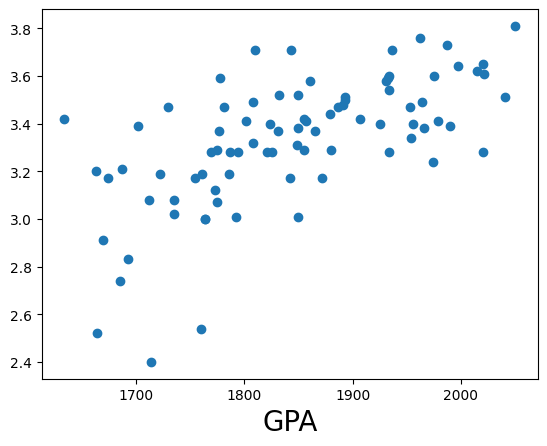

In [21]:
y = data['GPA']
x = data['SAT']
plt.scatter(x,y)
plt.xlabel('SAT', fontsize=20)
plt.xlabel('GPA', fontsize=20)
plt.show()

In [22]:
k = 8

def distance(array, value):
    array = np.array(array)
    return abs(array-value)

def find_nearest_index(array, value, k):
    array_D = distance(array, value)
    return np.argsort(array_D)[:k]

data_len = len(x)

X_train = np.array(x[:64])
Y_train = np.array(y[:64])

X_test = np.array(x[64:data_len])
Y_test = np.array(y[64:data_len])

k = 8

In [25]:
Y_pred = np.zeros(len(X_test))

for i in range(len(X_test)):
    indexis = find_nearest_index(X_train, X_test[i], k)
    for id in indexis:
        Y_pred[i] = Y_pred[i] + Y_train[id]
    Y_pred[i] = Y_pred[i]/len(indexis)
    print(Y_pred[i], ' | ', Y_test[i])

SSE, MAE, R_2, TSS =0, 0, 0, 0
for i in range(len(Y_pred)):
    SSE = SSE + (Y_pred[i] - Y_test[i])**2
    MAE = MAE + abs(Y_pred[i] - Y_test[i])
    TSS = TSS + (Y_test[i] - np.mean(Y_test)) ** 2
R_2 = 1 - SSE/TSS
MAE = MAE/len(Y_pred)
print('MSE = ', SSE/len(Y_pred))
print('Mae = ', MAE)
print('R^2 = ', R_2)

3.47375  |  3.47
3.2075  |  3.29
3.51875  |  3.71
3.4162500000000007  |  3.48
3.56625  |  3.51
3.4937500000000004  |  3.6
3.4737500000000003  |  3.34
3.3600000000000003  |  3.28
3.0925000000000002  |  2.52
3.4912500000000004  |  3.42
3.0549999999999997  |  3.19
3.1799999999999997  |  2.54
2.965  |  3.21
3.32125  |  3.71
3.56625  |  3.61
3.19375  |  3.19
3.44875  |  3.49
3.20875  |  3.59
3.2075  |  3.12
3.35875  |  3.42
MSE =  0.060920078124999985
Mae =  0.16943750000000002
R^2 =  0.39252899244401573


# A2

In [5]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

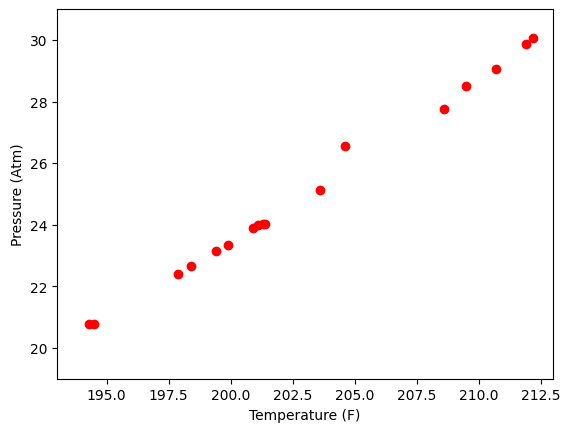

In [55]:
X = np.array([194.5, 194.3, 197.9, 198.4, 199.4, 199.9, 200.9, 201.1, 201.4, 201.3, 203.6, 204.6, 209.5, 208.6, 210.7, 211.9, 212.2])
y = np.array([20.79, 20.79,22.4, 22.67, 23.15, 23.35, 23.89, 23.99, 24.02, 24.01, 25.14, 26.57, 28.49, 27.76, 29.04, 29.88, 30.06 ])

data = pd.DataFrame({'Temp':X, 'Press':y}).sample(frac=1, random_state=42).reset_index(drop=True)
data

X = data['Temp']
y = data['Press']
plt.plot(X, y, 'ro')
plt.axis([193, 213,19,31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()

In [59]:
k = 4
def distance(array, value):
    array = np.array(array)
    return abs(array-value)

def find_nearest_index(array, value, k):
    array_D = distance(array, value)
    return np.argsort(array_D)[:k]

data_len = len(X)

X_train = np.array(X[:12])
Y_train = np.array(y[:12])
X_test = np.array(X[12:data_len])
Y_test = np.array(y[12:data_len])

In [61]:
Y_pred = np.zeros(len(X_test))
for i in range(len(X_test)):
    indexis = find_nearest_index(X_train, X_test[i], k)
    for id in indexis:
        Y_pred[i] = Y_pred[i] + Y_train[id]
    Y_pred[i] = Y_pred[i]/len(indexis)
    print(Y_pred[i], ' | ', Y_test[i])
SSE, MAE, R_2, TSS =0, 0, 0, 0
for i in range(len(Y_pred)):
    SSE = SSE + (Y_pred[i] - Y_test[i])**2
    MAE = MAE + abs(Y_pred[i] - Y_test[i])
    TSS = TSS + (Y_test[i] - np.mean(Y_test)) ** 2
R_2 = 1 - SSE/TSS
MAE = MAE/len(Y_pred)
print('MSE = ', SSE/len(Y_pred))
print('Mae = ', MAE)
print('R^2 = ', R_2)

23.6325  |  23.99
24.487500000000004  |  25.14
29.185  |  28.49
23.227500000000003  |  22.67
23.6325  |  23.89
MSE =  0.2827399999999991
Mae =  0.5039999999999992
R^2 =  0.9284069132881471


# A3

In [63]:
import math
import numpy as np

In [69]:
with open('fuel.txt') as f:
    lines = f.readlines()
x_data = []
y_data = []
lines.pop(0)
for line in lines:
    splitted = line.replace('\n', '').split(',')
    splitted.pop(0)
    splitted = list(map(float, splitted))
    fuel = 1000 * splitted[1] / splitted[5]
    dlic = 1000 * splitted[0] / splitted[5]
    logMiles = math.log2(splitted[3])
    y_data.append([fuel])
    x_data.append([splitted[-1], dlic, splitted[2], logMiles])
x_data = np.asarray(x_data)
y_data = np.asarray(y_data)

In [76]:
k = 6
def distance(array, value):
    array = np.array(array)
    return np.linalg.norm(array - value,ord=2, axis=1)

def find_nearest_index(array, value, k):
    array_D = distance(array, value)
    return np.argsort(array_D)[:k]

data_len = len(x_data)

X_train = np.array(x_data[:40])
Y_train = np.array(y_data[:40])
X_test = np.array(x_data[40:data_len])
Y_test = np.array(y_data[40:data_len])

In [77]:
Y_pred = np.zeros(len(X_test))
for i in range(len(X_test)):
    indexis = find_nearest_index(X_train, X_test[i], k)
    for id in indexis:
        Y_pred[i] = Y_pred[i] + Y_train[id]
    Y_pred[i] = Y_pred[i]/len(indexis)
    print(Y_pred[i], ' | ', Y_test[i])
SSE, MAE, R_2, TSS =0, 0, 0, 0
for i in range(len(Y_pred)):
    SSE = SSE + (Y_pred[i] - Y_test[i])**2
    MAE = MAE + abs(Y_pred[i] - Y_test[i])
    TSS = TSS + (Y_test[i] - np.mean(Y_test)) ** 2
R_2 = 1 - SSE/TSS
MAE = MAE/len(Y_pred)
print('MSE = ', SSE/len(Y_pred))
print('Mae = ', MAE)
print('R^2 = ', R_2)

655.9029512433245  |  [711.73305769]
638.4560580336707  |  [697.05277706]
638.4560580336706  |  [638.23106095]
611.9269910198954  |  [681.10013659]
655.9029512433245  |  [591.49994589]
644.4898294882122  |  [691.02271186]
588.0444680617263  |  [681.03112144]
605.0998495739349  |  [576.06974956]
662.653139627235  |  [562.4109333]
584.9524291587197  |  [581.79371695]
644.4898294882122  |  [842.79175243]
MSE =  [6956.3637859]
Mae =  [65.31640461]
R^2 =  [-0.13937317]


C:\Users\DELL\AppData\Local\Temp\ipykernel_8320\3964336594.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y_pred[i] = Y_pred[i] + Y_train[id]


# B1

In [6]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

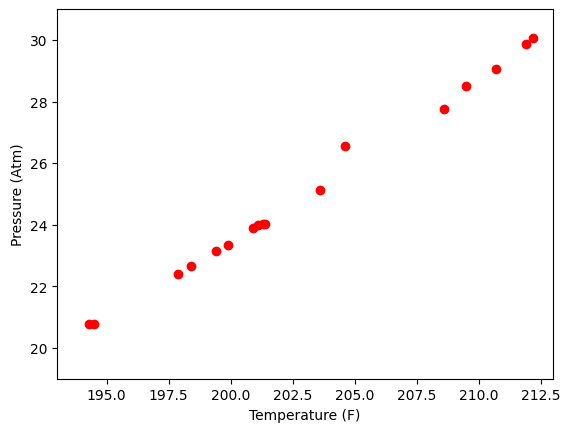

In [63]:
X = np.array([[194.5, 194.3, 197.9, 198.4, 199.4, 199.9, 200.9, 201.1, 201.4,
               201.3, 203.6, 204.6, 209.5, 208.6, 210.7, 211.9, 212.2]])
y = np.array([[20.79, 20.79, 22.4, 22.67, 23.15, 23.35, 23.89, 23.99, 24.02,
               24.01, 25.14, 26.57, 28.49, 27.76, 29.04, 29.88, 30.06]])
data = pd.DataFrame({'Temp':X[0], 'Press':y[0]}).sample(frac=1, random_state=42).reset_index(drop=True)
data

X = data['Temp'].values.reshape(-1 ,1)
y = data['Press'].values.reshape(-1 ,1)
plt.plot(X, y, 'ro')
plt.axis([193, 213,19,31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()

w =  [[-81.06372713]
 [  0.5228924 ]]


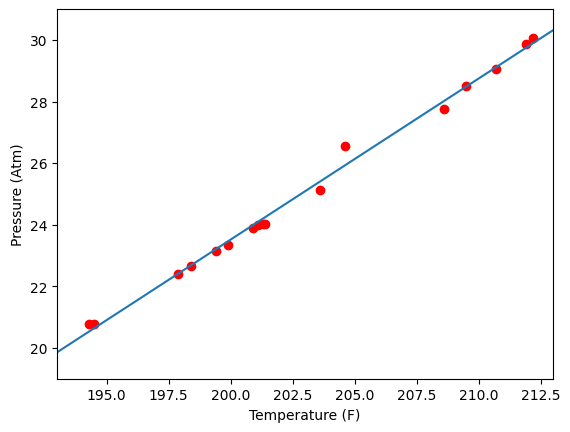

In [64]:
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)
# Preparing the fitting line
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(193, 213, 2)
y0 = w_0 + w_1*x0

# Drawing the fitting line
plt.plot(X.T, y.T, 'ro') # data
plt.plot(x0, y0) # the fitting line
plt.axis([193, 213, 19, 31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()

# B2

In [65]:
import math
import numpy as np

In [89]:
with open('fuel.txt') as f:
    lines = f.readlines()

x_data = []
y_data = []
lines.pop(0)

for line in lines:
    splitted = line.replace('\n', '').split(',')
    splitted.pop(0)
    splitted = list(map(float, splitted))
    fuel = 1000 * splitted[1] / splitted[5]
    dlic = 1000 * splitted[0] / splitted[5]
    logMiles = math.log2(splitted[3])
    y_data.append([fuel])
    x_data.append([splitted[-1], dlic, splitted[2], logMiles])

x_data = np.asarray(x_data)
y_data = np.asarray(y_data)

In [75]:
def qr_householder(A):
    #""" Compute QR decomposition of A using Householder reflection"""
    M = A.shape[0]
    N = A.shape[1]

    # set Q to the identity matrix
    Q = np.identity(M)

    # set R to zero matrix
    R = np.copy(A)

    for n in range(N):
    # vector to transform
        x = A[n:, n]
        k = x.shape[0]
        ro = -np.sign(x[0]) * np.linalg.norm(x)

        # compute the householder vector v
        e = np.zeros(k)
        e[0] = 1
        v = (1 / (x[0] - ro)) * (x - (ro * e))

        # apply v to each column of A to find R
        for i in range(N):
            R[n:, i] = R[n:, i] - (2 / (v@v)) * ((np.outer(v, v)) @ R[n:, i])

        # apply v to each column of Q
        for i in range(M):
            Q[n:, i] = Q[n:, i] - (2 / (v@v)) * ((np.outer(v, v)) @ Q[n:, i])

    return Q.transpose(), R

In [76]:
def linear_regression(x_data, y_data):
    # """
    # This function calculate linear regression base on x_data and y_data
    # :param x_data: vector
    # :param y_data: vector
    # :return: w (regression estimate)
    # """

    # add column 1
    x_bars = np.concatenate((np.ones((x_data.shape[0], 1)), x_data), axis=1)

    Q, R = qr_householder(x_bars) # QR decomposition
    R_pinv = np.linalg.pinv(R) # calculate inverse matrix of R
    A = np.dot(R_pinv, Q.T) # apply formula

    return np.dot(A, y_data)

In [90]:
w = linear_regression(x_data, y_data) # get result
w = w.T.tolist()

line = ['Intercept', 'Tax', "Dlic", "Income", 'LogMiles']
res = list(zip(line, w[0]))
for o in res:
    print("{: >20}: {: >10}".format(*o))

           Intercept: 154.19284457730794
                 Tax: -4.227983208329624
                Dlic: 0.4718712134419837
              Income: -0.0061353309704178065
            LogMiles: 18.545274506048024


In [78]:
from sklearn import datasets, linear_model
# Load training data here and assign to Xbar (obs. Data) and y (label)
# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False)
# fit_intercept = False for calculating the bias
regr.fit(Xbar, y)

,fit_intercept,False
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False
